# Caderno de Análise de Dados 3 - Outros dados Macroeconômicos e o Enem 2019

In [53]:
library(tidyverse)
library(repr)
options(repr.plot.width= 7, repr.plot.height=4)

#### Carregamento dos dados, conversão de tipos, sumarização dos acessos a internet e reordenamento

In [64]:
complete_data = read.csv("data/integrated_processed_enem_anatel_ibge_2019.csv")
complete_data[5:19] = sapply(complete_data[5:19], as.numeric)
complete_data_with_totalnet = complete_data %>%
    group_by(cod_municipio_ibge) %>%
    summarise(densidade_total_internet_fixa = fibra_optica + wifi + ethernet + lte + vsatelite + wimax + plc_eletrico + xdsl + cable_modem 
            + fwa_5g_fixed + atm_backbone + dth_satelite + hfc_tv_cabo + fr_frame_relay + mmds) %>%
    merge(complete_data, by.y = "cod_municipio_ibge" ) %>%
    data.frame()
complete_data_with_totalnet = complete_data_with_totalnet %>%
    select(cod_municipio_ibge, NO_MUNICIPIO_RESIDENCIA, UF,fibra_optica, wifi, ethernet, lte, vsatelite ,wimax , plc_eletrico,
        xdsl, cable_modem, fwa_5g_fixed, atm_backbone, dth_satelite, hfc_tv_cabo, fr_frame_relay, mmds,
        densidade_total_internet_fixa, remuneracao_media, desvio_padrao, gini, pib, pib_p_capta, media_idhm,
        mean_grades_group_cities) %>%
        data.frame()
str(complete_data_with_totalnet)

'data.frame':	5570 obs. of  26 variables:
 $ cod_municipio_ibge           : int  1100015 1100023 1100031 1100049 1100056 1100064 1100072 1100080 1100098 1100106 ...
 $ NO_MUNICIPIO_RESIDENCIA      : Factor w/ 5299 levels "\xc1gua Azul do Norte",..: 137 371 805 835 1167 1256 1359 1364 1628 1900 ...
 $ UF                           : Factor w/ 27 levels "AC","AL","AM",..: 21 21 21 21 21 21 21 21 21 21 ...
 $ fibra_optica                 : num  0 0 3 0 0 0 5 0 0 0 ...
 $ wifi                         : num  0 0 129 0 0 618 108 0 0 0 ...
 $ ethernet                     : num  3 47 2 0 0 0 3 0 5 26 ...
 $ lte                          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ vsatelite                    : num  0 0 3 0 0 0 0 0 4 0 ...
 $ wimax                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ plc_eletrico                 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ xdsl                         : num  239 0 75 0 644 524 156 0 553 1880 ...
 $ cable_modem                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ fw

## Dados da Remuneração média por Unidades Federativa

### Estudo da Correlação Linear entre Média das Remunerações e a Média das Notas do Enem no Brasil, ano 2019:

In [58]:
library(PerformanceAnalytics)

#### Scatter plot entre os dados da Remuneração Média por UF a média das notas do Enem:

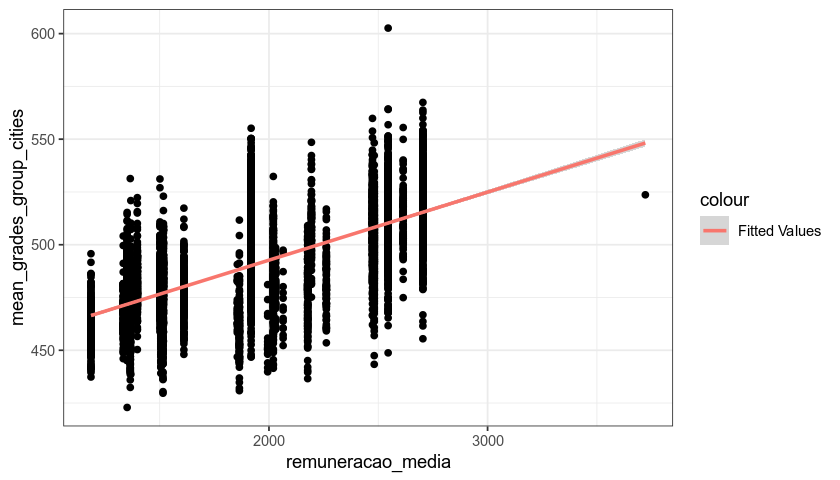

In [61]:
ggplot(data = complete_data_with_totalnet) + aes(x = remuneracao_media, 
    y= mean_grades_group_cities) + 
    geom_point() + geom_smooth(aes(color="Fitted Values"), method = "lm", level = 0.95) + 
    theme_bw()

###  Índice de correlação PEARSON entre as variáveis: Média das Notas do Enem e a Média das Remunerações.

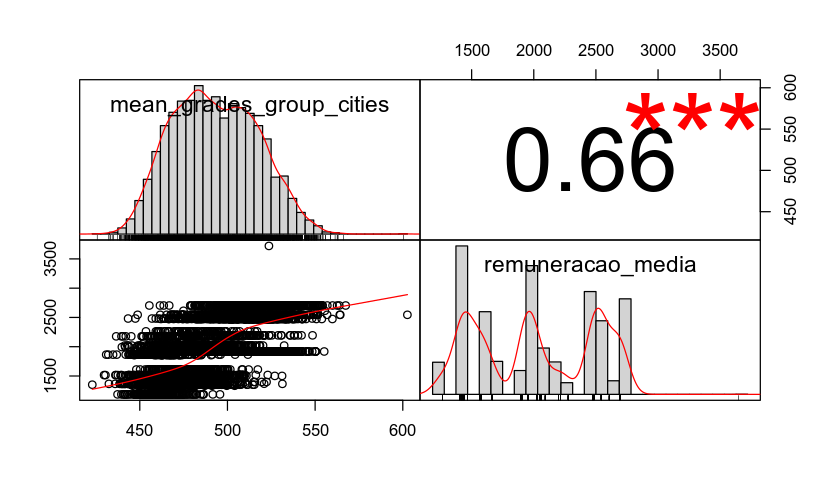

In [60]:
chart.Correlation(complete_data_with_totalnet[c("mean_grades_group_cities", "remuneracao_media")],
    method= "pearson")

## Dados do Índice de GINI 

### Estudo da Correlação Linear entre o Índice de Gini e a Média das Notas do Enem no Brasil, ano 2019:

#### Scatter plot entre os dados de Gini por UF a média das notas do Enem:

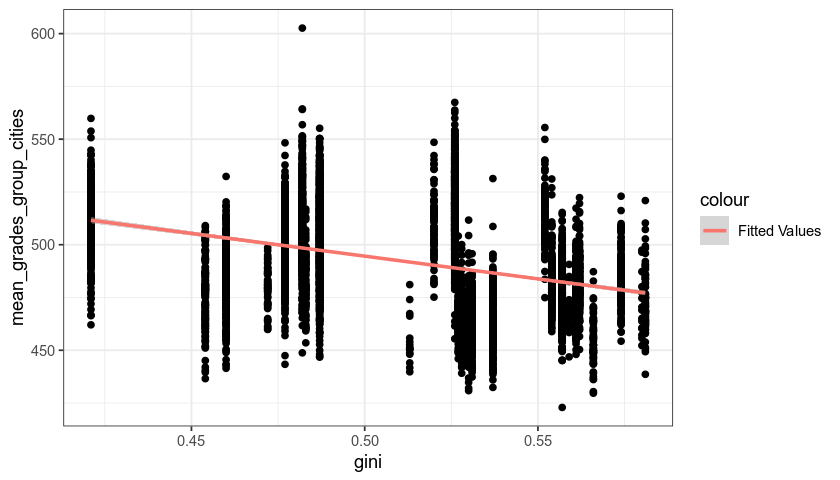

In [65]:
ggplot(data = complete_data_with_totalnet) + aes(x = gini, 
    y= mean_grades_group_cities) + 
    geom_point() + geom_smooth(aes(color="Fitted Values"), method = "lm", level = 0.95) + 
    theme_bw()

###  Índice de correlação PEARSON entre as variáveis: Média das Notas do Enem e o Índice de Gini

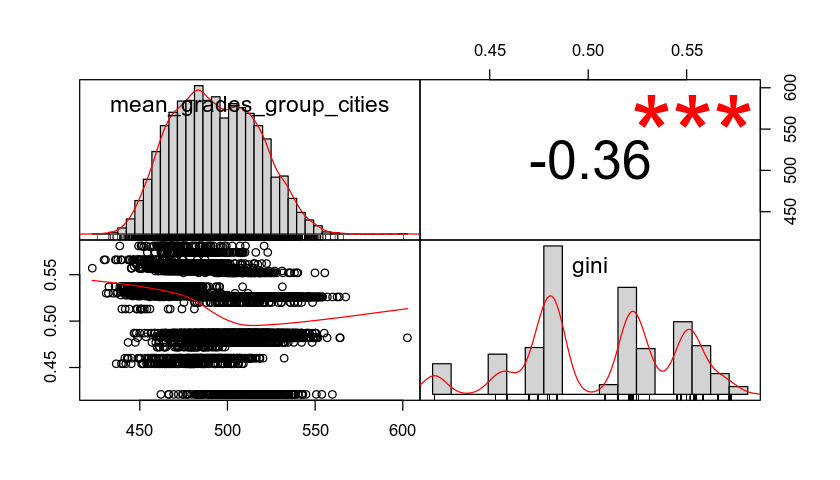

In [66]:
chart.Correlation(complete_data_with_totalnet[c("mean_grades_group_cities", "gini")],
    method= "pearson")

## Dados do PIB por Município

### Estudo da Correlação Linear entre o PIB Municipal e a Média das Notas do Enem no Brasil, ano 2019:

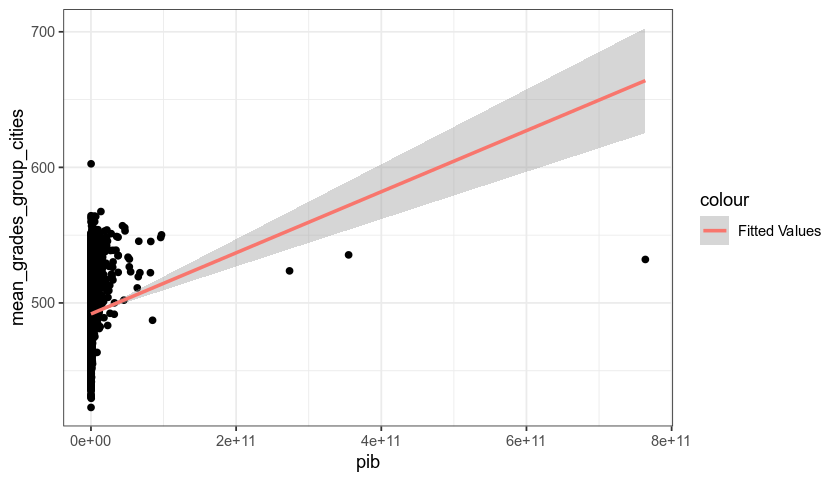

In [67]:
ggplot(data = complete_data_with_totalnet) + aes(x = pib, 
    y= mean_grades_group_cities) + 
    geom_point() + geom_smooth(aes(color="Fitted Values"), method = "lm", level = 0.95) + 
    theme_bw()

###  Índice de correlação PEARSON entre as variáveis: Média das Notas do Enem e o PIB por município

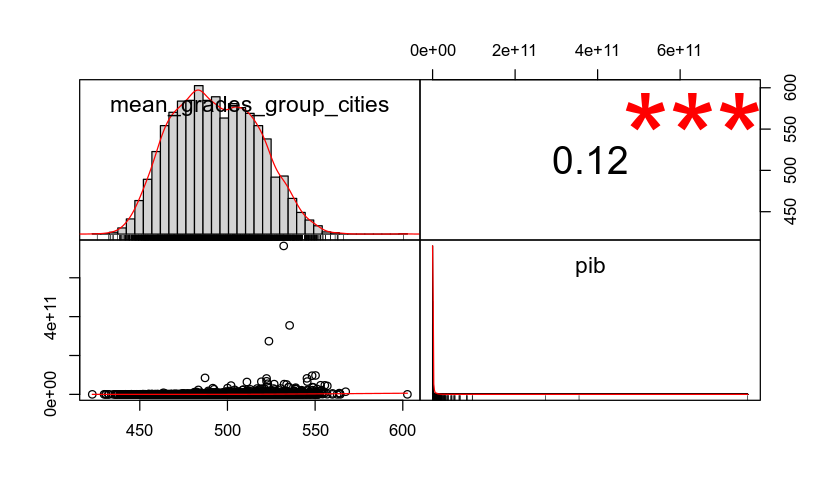

In [68]:
chart.Correlation(complete_data_with_totalnet[c("mean_grades_group_cities", "pib")],
    method= "pearson")

## Dados do PIB Per Capta por Município:

### Estudo da Correlação Linear entre o PIB Per Capta Municipal e a Média das Notas do Enem no Brasil, ano 2019:

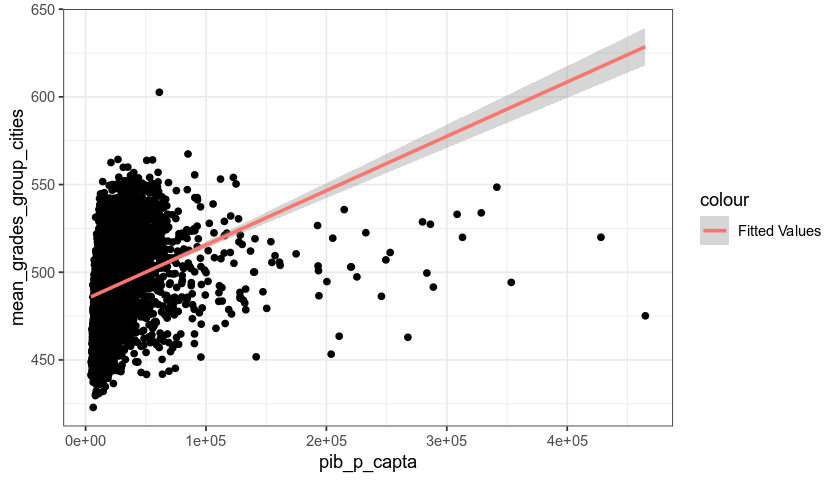

In [70]:
ggplot(data = complete_data_with_totalnet) + aes(x = pib_p_capta, 
    y= mean_grades_group_cities) + 
    geom_point() + geom_smooth(aes(color="Fitted Values"), method = "lm", level = 0.95) + 
    theme_bw()

###  Índice de correlação PEARSON entre as variáveis: Média das Notas do Enem e o PIB per Capta

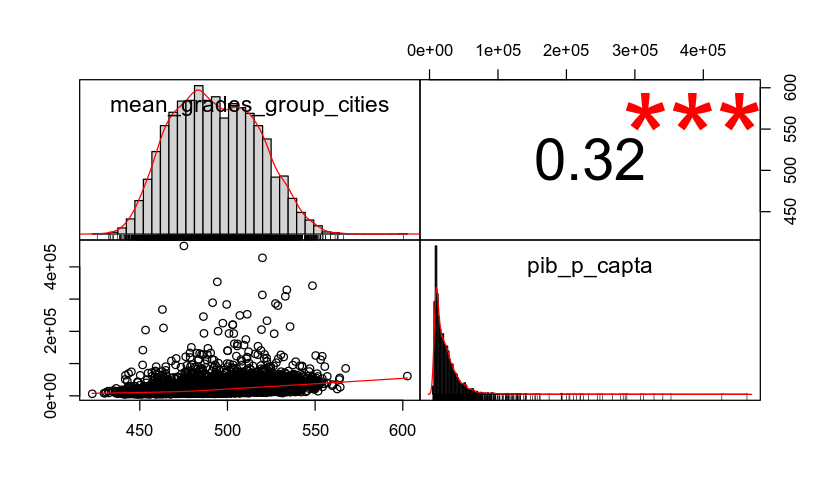

In [72]:
chart.Correlation(complete_data_with_totalnet[c("mean_grades_group_cities", "pib_p_capta")],
    method= "pearson")

## Dados do IDHM Médio por UFs:

### Estudo da Correlação Linear entre o IDHM Médio por UFs a Média das Notas do Enem no Brasil, ano 2019:

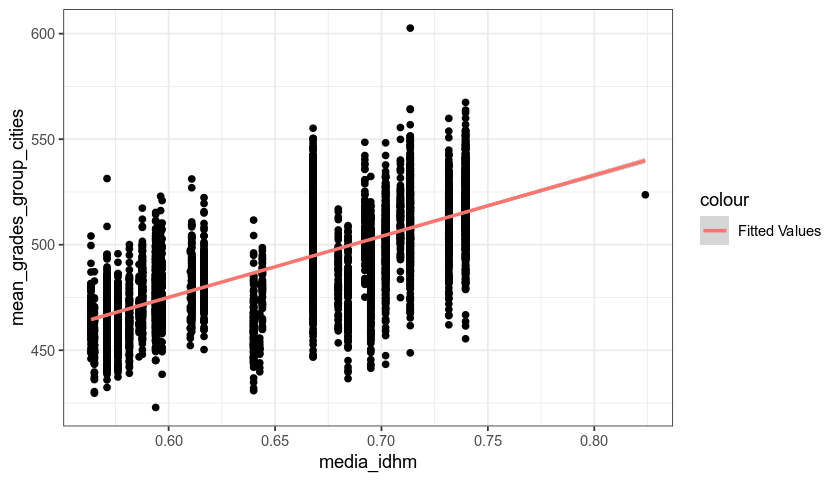

In [73]:
ggplot(data = complete_data_with_totalnet) + aes(x = media_idhm, 
    y= mean_grades_group_cities) + 
    geom_point() + geom_smooth(aes(color="Fitted Values"), method = "lm", level = 0.95) + 
    theme_bw()

###  Índice de correlação PEARSON entre as variáveis: Média das Notas do Enem e o IDHM Médio

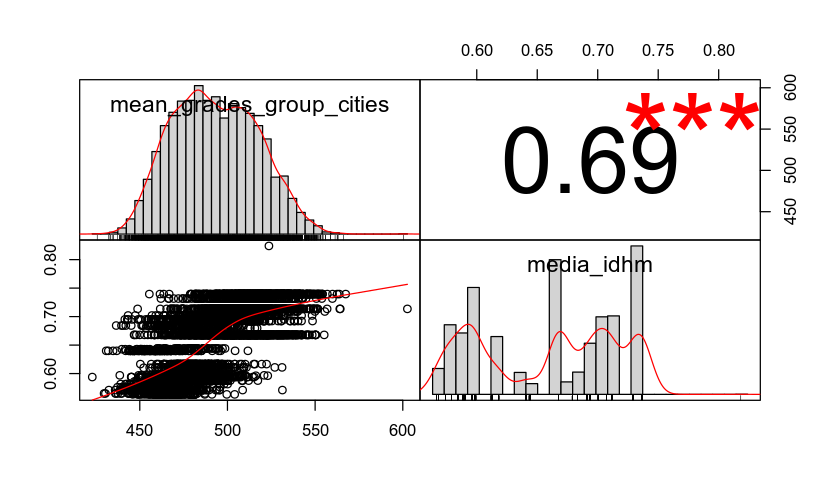

In [77]:
chart.Correlation(complete_data_with_totalnet[c("mean_grades_group_cities", "media_idhm")],
    method= "pearson")

### FIM 